## Data loading and initial inspection



In [ ]:
import pandas as pd

df = pd.read_excel('/content/OnlineRetail.xlsx')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nData types of each column:")
display(df.info())

print("\nShape of the DataFrame (rows, columns):")
display(df.shape)

First 5 rows of the DataFrame:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None


Shape of the DataFrame (rows, columns):


(541909, 8)


- Kích thước dữ liệu lớn (541,909 dòng và 8 cột) cho thấy đây là một tập dữ liệu phong phú để phân tích hành vi mua sắm và xu hướng bán hàng..
- Các cột bao gồm `InvoiceNo` (số hóa đơn), `StockCode` (mã sản phẩm), `Description` (mô tả sản phẩm), `Quantity` (số lượng), `InvoiceDate` (ngày hóa đơn), `UnitPrice` (đơn giá), `CustomerID` (ID khách hàng) và `Country` (quốc gia).
- Sự hiện diện của các cột như `Quantity`, `UnitPrice`, `InvoiceDate`, và `CustomerID` cho phép chúng ta tính toán doanh thu, phân tích xu hướng theo thời gian và hiểu rõ hơn về hành vi của từng khách hàng.
- Kiểu dữ liệu của các cột phù hợp: `InvoiceDate` là datetime, `Quantity` là int64, `UnitPrice` và `CustomerID` là float64, còn lại là object (string).
- Dữ liệu bao gồm giao dịch từ nhiều quốc gia, mở ra cơ hội phân tích thị trường theo địa lý.

In [ ]:
# Check missing values
print("🔍 Number of missing values per column:")
missing_values = df.isnull().sum()
display(missing_values)

# Check duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n📋 Number of duplicate rows: {duplicate_count}")

# Check transactions with zero price or zero quantity
zero_price = (df['UnitPrice'] == 0).sum()
zero_quantity = (df['Quantity'] == 0).sum()
print(f"\n💰 Transactions with zero price: {zero_price}")
print(f"📦 Transactions with zero quantity: {zero_quantity}")

# Display summary of findings
print("\n📊 Summary:")
print(f"→ Missing values found in {missing_values[missing_values > 0].shape[0]} columns.")
print(f"→ {duplicate_count} duplicate rows detected.")
print(f"→ {zero_price} transactions have zero price, and {zero_quantity} have zero quantity.")


🔍 Number of missing values per column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


📋 Number of duplicate rows: 5268

💰 Transactions with zero price: 2515
📦 Transactions with zero quantity: 0

📊 Summary:
→ Missing values found in 2 columns.
→ 5268 duplicate rows detected.
→ 2515 transactions have zero price, and 0 have zero quantity.


### Technical Explanation:
- Có 1454 giá trị bị thiếu trong cột `Description` và 135,080 giá trị bị thiếu trong cột `CustomerID`.
- Có 5268 dòng bị trùng lặp trong tập dữ liệu.
- Có 2515 giao dịch có `UnitPrice` bằng 0.
- Không có giao dịch nào có `Quantity` bằng 0.

### Economic Interpretation:
- Số lượng lớn giá trị thiếu trong cột `CustomerID` (chiếm khoảng 25% tổng số dòng) chỉ ra rằng một phần đáng kể các giao dịch không liên kết với một khách hàng cụ thể. Điều này có thể do các giao dịch bán lẻ tại cửa hàng vật lý hoặc các lý do khác khiến thông tin khách hàng không được ghi lại. Việc này sẽ ảnh hưởng đến khả năng phân tích hành vi khách hàng cá nhân và phân khúc khách hàng.
- Các giá trị thiếu trong cột `Description` có thể gây khó khăn trong việc phân tích sản phẩm và danh mục sản phẩm một cách chính xác.
- Sự hiện diện của các dòng trùng lặp cho thấy có thể có lỗi trong quá trình thu thập dữ liệu hoặc nhập liệu. Việc loại bỏ chúng là cần thiết để tránh làm sai lệch kết quả phân tích về số lượng giao dịch và doanh thu.
- Các giao dịch có `UnitPrice` bằng 0 có thể đại diện cho các mặt hàng khuyến mãi, quà tặng, hoặc các mục điều chỉnh/ghi nợ. Việc loại bỏ các giao dịch này khỏi phân tích doanh thu là hợp lý để tập trung vào doanh thu thực tế từ bán hàng.
- Việc không có giao dịch nào có `Quantity` bằng 0 sau khi làm sạch dữ liệu ban đầu xác nhận rằng các đơn hàng trả lại hoặc bị hủy đã được loại bỏ ở bước trước (nếu có trong dữ liệu gốc trước khi làm sạch).

## Data cleaning




In [ ]:
# Drop rows with missing values in 'Description' and 'CustomerID'
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Filter out rows where Quantity is less than or equal to 0
df = df[df['Quantity'] > 0]

# Filter out rows where UnitPrice is less than or equal to 0
df = df[df['UnitPrice'] > 0]

print("DataFrame after cleaning:")
display(df.head())

print("\nShape of the DataFrame after cleaning:")
display(df.shape)

DataFrame after cleaning:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom


Shape of the DataFrame after cleaning:


(392692, 8)

### Technical Explanation:
- Sau khi thực hiện các bước làm sạch (loại bỏ dòng thiếu `Description` và `CustomerID`, xóa dòng trùng lặp, lọc giao dịch có `Quantity` <= 0 và `UnitPrice` <= 0), kích thước của DataFrame đã giảm từ 541,909 dòng xuống còn 392,692 dòng.
- Số lượng cột vẫn giữ nguyên là 8.
- Bảng hiển thị 5 dòng đầu tiên của DataFrame sau khi làm sạch cho thấy dữ liệu đã được giữ lại là các giao dịch bán hàng hợp lệ với `Quantity` và `UnitPrice` dương, và có đầy đủ thông tin `Description` và `CustomerID`.

### Economic Interpretation:
- Việc giảm số lượng dòng cho thấy có một lượng đáng kể dữ liệu ban đầu không phù hợp cho mục đích phân tích hành vi khách hàng (do thiếu ID khách hàng) hoặc là các giao dịch không phải bán hàng thực tế (trùng lặp, giá/số lượng bằng 0, hoặc trả hàng).
- Tập dữ liệu sau làm sạch (392,692 dòng) là tập dữ liệu tin cậy hơn để phân tích doanh thu, xu hướng bán hàng và hành vi của các khách hàng đã biết.
- Mặc dù chúng ta đã loại bỏ các giao dịch không có `CustomerID`, tập dữ liệu còn lại vẫn đủ lớn để cung cấp những hiểu biết có giá trị về phần lớn hoạt động kinh doanh.
- Việc tập trung vào các giao dịch có `Quantity` và `UnitPrice` dương đảm bảo rằng các phân tích về doanh thu sẽ phản ánh chính xác doanh thu từ các giao dịch bán hàng thành công.

:## Statistical description and outlier analysis



Descriptive Statistics:


Quantity      UnitPrice        Revenue
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914      22.631500
std       180.492832      22.241836     311.099224
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

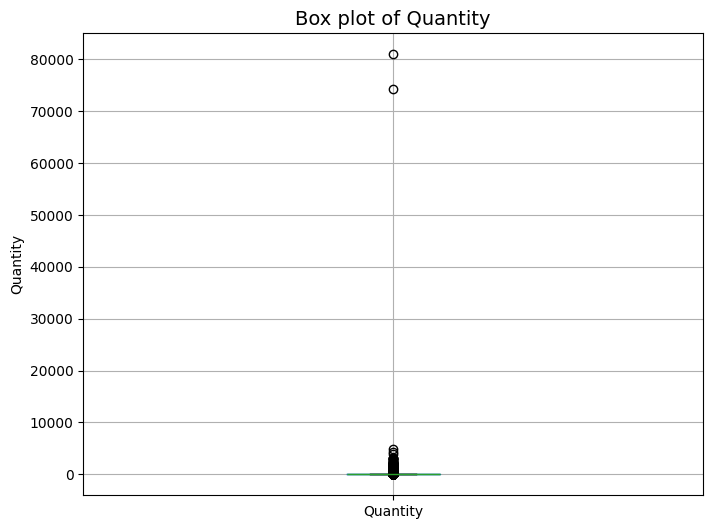

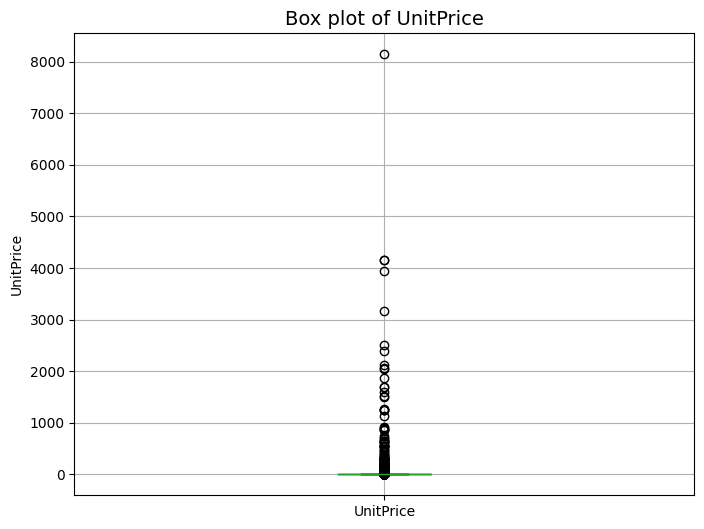

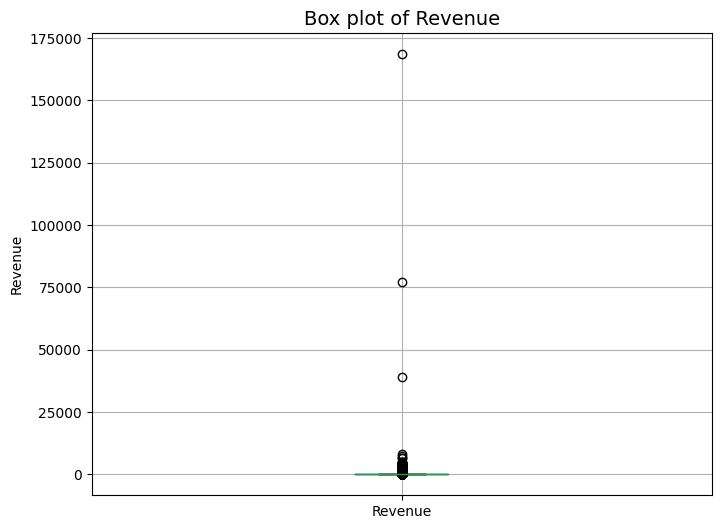

In [ ]:
# Calculate 'Revenue' column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Calculate descriptive statistics
descriptive_stats = df[['Quantity', 'UnitPrice', 'Revenue']].describe()
print("Descriptive Statistics:")
display(descriptive_stats)

# Create box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='Quantity')
plt.title('Box plot of Quantity', fontsize=14)
plt.ylabel('Quantity')
plt.show()

plt.figure(figsize=(8, 6))
df.boxplot(column='UnitPrice')
plt.title('Box plot of UnitPrice', fontsize=14)
plt.ylabel('UnitPrice')
plt.show()

plt.figure(figsize=(8, 6))
df.boxplot(column='Revenue')
plt.title('Box plot of Revenue', fontsize=14)
plt.ylabel('Revenue')
plt.show()


### Technical Explanation:
- Cột 'Revenue' đã được tạo thành công bằng cách nhân 'Quantity' với 'UnitPrice'.
- Bảng mô tả thống kê (`descriptive_stats`) cho thấy:
    - Số lượng (`Quantity`), Đơn giá (`UnitPrice`) và Doanh thu (`Revenue`) có sự phân tán lớn, được thể hiện qua độ lệch chuẩn (`std`) cao so với giá trị trung bình (`mean`).
    - Giá trị lớn nhất (`max`) của cả ba cột này rất cao (80995 cho `Quantity`, 8142.75 cho `UnitPrice`, và 168469.60 cho `Revenue`), cho thấy sự hiện diện của các ngoại lệ (outliers).
- Biểu đồ box plot xác nhận sự tồn tại của nhiều ngoại lệ, đặc biệt là ở phía giá trị cao cho cả `Quantity`, `UnitPrice`, và `Revenue`. Hầu hết dữ liệu tập trung ở các giá trị thấp, trong khi một số ít giao dịch có giá trị rất lớn.

### Economic Interpretation:
- Sự phân tán lớn trong `Quantity`, `UnitPrice`, và `Revenue` phản ánh sự đa dạng trong các giao dịch bán hàng, từ các mặt hàng giá rẻ, số lượng ít đến các đơn hàng lớn, giá trị cao.
- Các ngoại lệ giá trị cao trong `Quantity`, `UnitPrice`, và `Revenue` có thể đại diện cho các đơn đặt hàng đặc biệt lớn, các mặt hàng xa xỉ hoặc có giá trị cao, hoặc các giao dịch bán buôn. Những giao dịch này đóng góp đáng kể vào tổng doanh thu nhưng không phản ánh hành vi mua sắm điển hình của đa số khách hàng cá nhân.
- Việc nhận diện các ngoại lệ này là quan trọng. Trong một số phân tích, chúng ta có thể cần xem xét việc xử lý (ví dụ: loại bỏ hoặc giới hạn) các ngoại lệ này để tránh làm sai lệch kết quả, đặc biệt khi phân tích hành vi khách hàng điển hình hoặc xây dựng các mô hình dự đoán. Tuy nhiên, trong phân tích tổng quan về doanh thu, các ngoại lệ này lại rất quan trọng vì chúng thể hiện các giao dịch có giá trị lớn.
- Phân tích này giúp chúng ta hiểu rõ hơn về cấu trúc doanh thu và sự đóng góp không đồng đều của các loại giao dịch khác nhau.

### Business Insights:
- Biểu đồ Boxplot cho biến Quantity cho thấy phần lớn giao dịch có số lượng nhỏ (phân phối lệch phải mạnh), chỉ có một số ít hóa đơn có lượng hàng rất lớn.
Điều này phản ánh đặc điểm mua lẻ chiếm đa số, còn mua sỉ hoặc đơn hàng bulk chỉ chiếm tỷ lệ rất nhỏ.
Đây là đặc trưng phổ biến của các doanh nghiệp bán lẻ trực tuyến, nơi khách hàng cá nhân chiếm phần lớn doanh thu nhưng tạo ra giá trị trung bình thấp hơn so với khách hàng doanh nghiệp.

##Correlation Analysis

Correlation Matrix:
           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.004578  0.914451
UnitPrice -0.004578   1.000000  0.081619
Revenue    0.914451   0.081619  1.000000


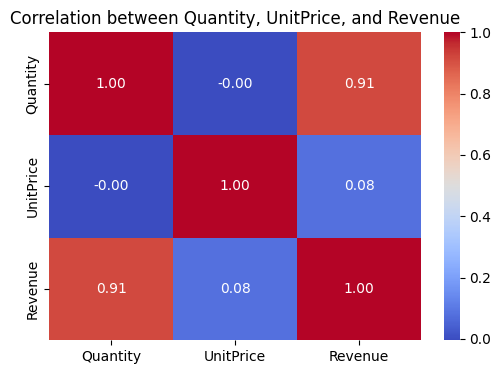

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ lấy các cột số liên quan đến doanh thu
numeric_cols = ['Quantity', 'UnitPrice', 'Revenue']

# Tính ma trận tương quan
corr_matrix = df[numeric_cols].corr()

# In ra ma trận tương quan
print("Correlation Matrix:")
print(corr_matrix)

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Quantity, UnitPrice, and Revenue")
plt.show()


### Technical Explanation:
- Ma trận tương quan đã được tính toán cho các cột số: `Quantity`, `UnitPrice`, và `Revenue`.
- Heatmap trực quan hóa ma trận tương quan, hiển thị mức độ và hướng (dương/âm) của mối quan hệ tuyến tính giữa các cặp biến.
- Kết quả cho thấy mối tương quan rất mạnh và dương giữa `Quantity` và `Revenue` (0.91).
- Mối tương quan giữa `UnitPrice` và `Revenue` là dương nhưng yếu hơn đáng kể (0.08).
- Mối tương quan giữa `Quantity` và `UnitPrice` rất yếu và âm (-0.0046).

### Economic Interpretation:
- Mối tương quan mạnh mẽ giữa `Quantity` và `Revenue` là điều dễ hiểu vì Doanh thu được tính bằng Số lượng nhân Đơn giá. Khi số lượng sản phẩm bán ra trong một giao dịch tăng lên, doanh thu từ giao dịch đó cũng tăng theo tỷ lệ thuận.
- Mối tương quan yếu giữa `UnitPrice` và `Revenue` cho thấy rằng, trong tập dữ liệu này, sự biến động của đơn giá ít ảnh hưởng đến tổng doanh thu hơn so với sự biến động của số lượng. Điều này có thể ngụ ý rằng phần lớn doanh thu đến từ việc bán số lượng lớn các mặt hàng có đơn giá trung bình hoặc thấp, hoặc các mặt hàng có đơn giá cao không được bán với số lượng đủ lớn để tạo ra mối tương quan mạnh với tổng doanh thu.
- Mối tương quan rất yếu và âm giữa `Quantity` và `UnitPrice` cho thấy không có mối quan hệ tuyến tính rõ ràng giữa số lượng sản phẩm bán ra và đơn giá của chúng. Điều này có nghĩa là việc mua số lượng lớn không nhất thiết đi kèm với đơn giá thấp hơn (như trong trường hợp mua sỉ được giảm giá), hoặc nếu có thì hiệu ứng này không đủ mạnh để thể hiện rõ trong dữ liệu tổng thể.

### Business Insights:
- **Focus on Quantity**: Vì `Quantity` có tương quan mạnh nhất với `Revenue`, các chiến lược kinh doanh nhằm tăng số lượng sản phẩm bán ra trên mỗi giao dịch (ví dụ: bán theo gói, khuyến mãi mua nhiều giảm giá) có thể là cách hiệu quả để tăng doanh thu.
- **Pricing Strategy Impact**: `UnitPrice` có ảnh hưởng đến `Revenue`, nhưng không mạnh bằng `Quantity`. Doanh nghiệp nên xem xét kỹ lưỡng chiến lược định giá của mình. Có thể cần phân tích sâu hơn để hiểu liệu việc tăng giá có làm giảm số lượng bán ra và ảnh hưởng tổng thể đến doanh thu như thế nào.
- **No Clear Volume Discount Pattern**: Việc thiếu tương quan giữa `Quantity` và `UnitPrice` có thể chỉ ra rằng chính sách giá hiện tại không có chiết khấu rõ ràng cho các đơn hàng số lượng lớn. Doanh nghiệp có thể cân nhắc áp dụng các chính sách giá theo số lượng để khuyến khích khách hàng mua nhiều hơn.

## Sales over time analysis



/tmp/ipython-input-1030794167.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['Revenue'].sum().reset_index()


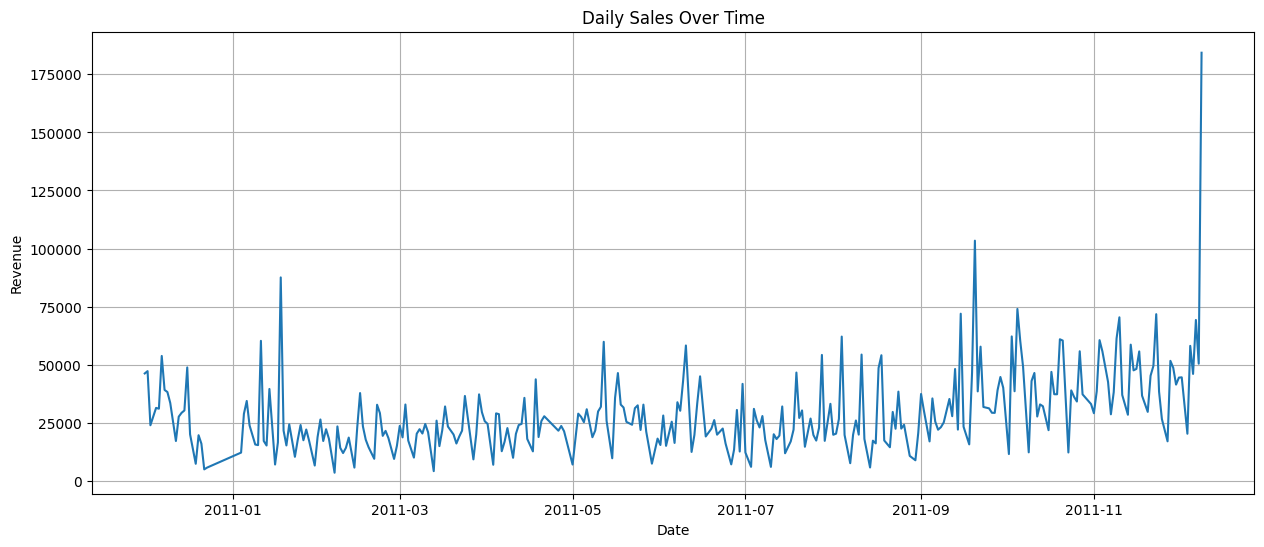

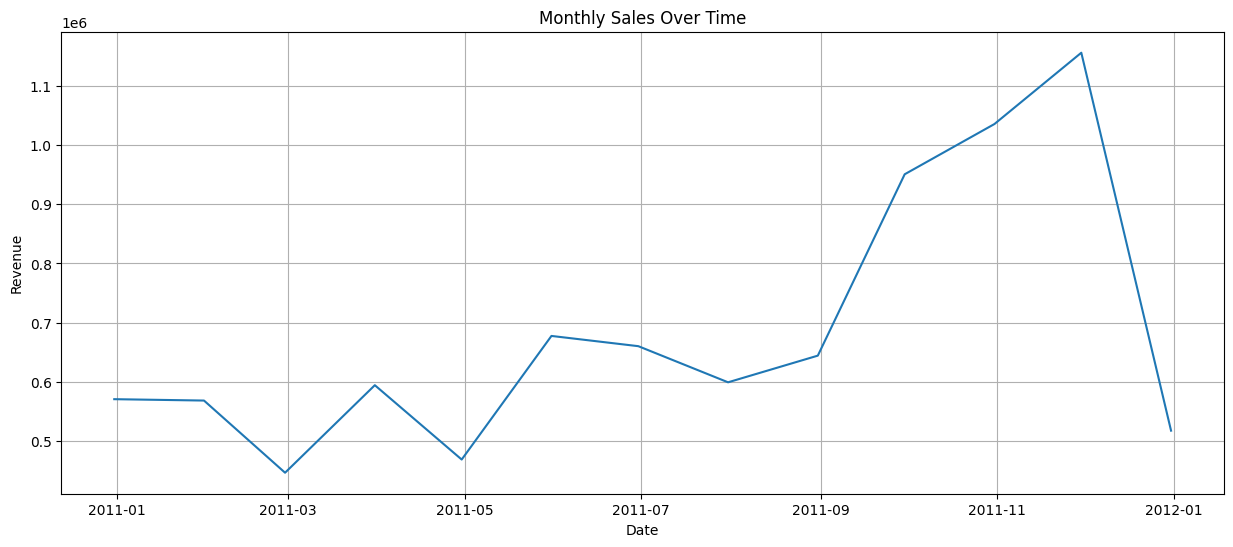

In [ ]:
# 1. Extract the date from the 'InvoiceDate' column
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# 2. Group by 'InvoiceDay' and calculate total revenue
daily_sales = df.groupby('InvoiceDay')['Revenue'].sum().reset_index()
daily_sales['InvoiceDay'] = pd.to_datetime(daily_sales['InvoiceDay'])

# 3. Resample by month and calculate total revenue
monthly_sales = df.set_index('InvoiceDate').resample('M')['Revenue'].sum().reset_index()

# 4. Plot the daily sales over time
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['InvoiceDay'], daily_sales['Revenue'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 5. Plot the monthly sales over time
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Revenue'])
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Technical Explanation:
- Biểu đồ doanh số hàng ngày (`Daily Sales Over Time`) hiển thị biến động doanh thu theo từng ngày trong khoảng thời gian của tập dữ liệu. Chúng ta có thể thấy sự biến động lớn giữa các ngày, với một số ngày có doanh thu cao đột biến.
- Biểu đồ doanh số hàng tháng (`Monthly Sales Over Time`) hiển thị tổng doanh thu theo từng tháng. Biểu đồ này cho thấy một xu hướng tăng trưởng tổng thể về doanh thu qua các tháng, với một đỉnh điểm đáng chú ý vào cuối năm 2011.
- Có thể quan sát thấy các mô hình theo mùa rõ rệt trong dữ liệu doanh số hàng tháng, với doanh thu tăng cao hơn vào các tháng cuối năm.

### Economic Interpretation:
- Xu hướng tăng trưởng tổng thể trong doanh số hàng tháng là tín hiệu tích cực cho thấy hoạt động kinh doanh đang phát triển trong giai đoạn này.
- Sự biến động lớn trong doanh số hàng ngày có thể phản ánh các yếu tố như ngày trong tuần, các chương trình khuyến mãi ngắn hạn, hoặc hành vi mua sắm của khách hàng cá nhân.
- Đỉnh điểm doanh số vào cuối năm (ví dụ: tháng 11 năm 2011) rất có thể liên quan đến mùa mua sắm cao điểm cuối năm (Black Friday, Giáng Sinh). Đây là một mô hình hành vi mua sắm phổ biến trong ngành bán lẻ.
- Việc nhận diện các mô hình theo mùa này giúp doanh nghiệp lập kế hoạch tồn kho, nhân sự và chiến lược marketing phù hợp để tối đa hóa doanh thu trong các giai đoạn cao điểm và duy trì hoạt động ổn định trong các giai đoạn thấp điểm.

### Business Insights:
- **Mùa vụ**: Tháng 11 là tháng có doanh thu cao nhất, có thể là do các sự kiện mua sắm cuối năm. Doanh nghiệp nên tập trung vào việc chuẩn bị và triển khai các chiến dịch bán hàng mạnh mẽ vào thời điểm này.
- **Xu hướng tăng trưởng**: Biểu đồ hàng tháng cho thấy xu hướng tăng trưởng dương. Doanh nghiệp nên tiếp tục đầu tư vào các kênh bán hàng và chiến lược thu hút khách hàng để duy trì đà tăng trưởng này.
- **Biến động hàng ngày**: Cần phân tích sâu hơn để hiểu các yếu tố ảnh hưởng đến biến động doanh số hàng ngày (ví dụ: ngày trong tuần, chiến dịch marketing cụ thể) để tối ưu hóa hoạt động vận hành và marketing hàng ngày.

## Segmentation by country



Top 10 Countries by Revenue:


Country  TotalRevenue  UniqueCustomers
35  United Kingdom   7285024.644             3920
23     Netherlands    285446.340                9
10            EIRE    265262.460                3
14         Germany    228678.400               94
13          France    208934.310               87
0        Australia    138453.810                9
30           Spain     61558.560               30
32     Switzerland     56443.950               21
3          Belgium     41196.340               25
31          Sweden     38367.830                8

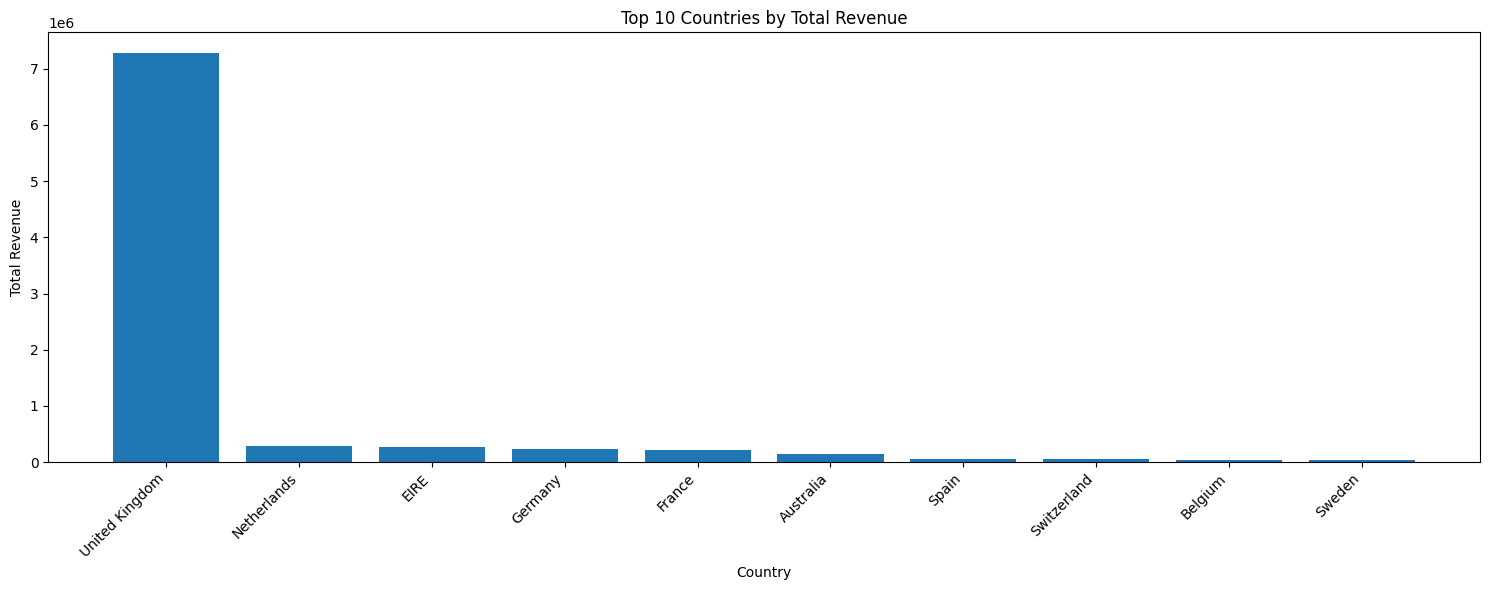

In [ ]:
# Group by 'Country' and calculate total revenue and unique customers
country_data = df.groupby('Country').agg(
    TotalRevenue=('Revenue', 'sum'),
    UniqueCustomers=('CustomerID', 'nunique')
).reset_index()

# Sort by TotalRevenue in descending order
country_data_sorted = country_data.sort_values(by='TotalRevenue', ascending=False)

# Display the top 10 countries by revenue
print("Top 10 Countries by Revenue:")
display(country_data_sorted.head(10))

# Create a bar plot for the top 10 countries by revenue
plt.figure(figsize=(15, 6))
plt.bar(country_data_sorted['Country'].head(10), country_data_sorted['TotalRevenue'].head(10))
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Technical Explanation:
- Dữ liệu đã được nhóm theo cột 'Country' và tính toán tổng doanh thu ('TotalRevenue') và số lượng khách hàng duy nhất ('UniqueCustomers') cho mỗi quốc gia.
- Kết quả được sắp xếp giảm dần theo tổng doanh thu.
- Bảng hiển thị 10 quốc gia hàng đầu theo doanh thu cho thấy 'United Kingdom' có doanh thu vượt trội so với các quốc gia khác.
- Biểu đồ cột trực quan hóa điều này, làm nổi bật sự đóng góp doanh thu áp đảo của 'United Kingdom'.

### Economic Interpretation:
- 'United Kingdom' là thị trường chính của doanh nghiệp, chiếm phần lớn đáng kể tổng doanh thu. Điều này có thể là do doanh nghiệp có trụ sở tại Anh hoặc có hoạt động marketing và phân phối mạnh mẽ nhất tại đây.
- Các quốc gia khác như Hà Lan, EIRE, Đức và Pháp cũng đóng góp đáng kể vào doanh thu, cho thấy tiềm năng ở các thị trường quốc tế này.
- Số lượng khách hàng duy nhất khác nhau đáng kể giữa các quốc gia. Mặc dù Hà Lan và EIRE có doanh thu cao thứ 2 và 3, số lượng khách hàng duy nhất của họ lại khá thấp so với Đức và Pháp, điều này có thể ngụ ý rằng các giao dịch ở Hà Lan và EIRE có giá trị trung bình trên mỗi khách hàng cao hơn.
- Việc phân tích này giúp doanh nghiệp hiểu rõ thị trường nào đang mang lại doanh thu cao nhất và thị trường nào có tiềm năng phát triển dựa trên số lượng khách hàng hoặc giá trị giao dịch trung bình.

### Business Insights:
- **Thị trường trọng điểm**: Tiếp tục tập trung nguồn lực vào thị trường Anh để duy trì và tăng trưởng doanh thu.
- **Tiềm năng thị trường quốc tế**: Xem xét đầu tư vào các thị trường quốc tế hàng đầu khác (Hà Lan, EIRE, Đức, Pháp...) để mở rộng quy mô. Cần phân tích sâu hơn để hiểu hành vi khách hàng ở các quốc gia này và điều chỉnh chiến lược phù hợp.
- **Giá trị khách hàng theo quốc gia**: Phân tích thêm về giá trị trọn đời (LTV) của khách hàng ở các quốc gia khác nhau để tối ưu hóa chi phí thu hút khách hàng. Ví dụ, mặc dù có ít khách hàng hơn, khách hàng ở Hà Lan và EIRE có thể mang lại giá trị cao hơn trên mỗi khách hàng.

## Segmentation by product



Top 10 Products by Total Quantity Sold:


StockCode                         Description  TotalQuantity  \
2529     23843         PAPER CRAFT , LITTLE BIRDIE          80995   
2027     23166      MEDIUM CERAMIC TOP STORAGE JAR          77916   
2705     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS          54319   
3569    85099B             JUMBO BAG RED RETROSPOT          46078   
3576    85123A  WHITE HANGING HEART T-LIGHT HOLDER          36706   
2810     84879       ASSORTED COLOUR BIRD ORNAMENT          35263   
359      21212     PACK OF 72 RETROSPOT CAKE CASES          33670   
1035     22197                      POPCORN HOLDER          30919   
1933     23084                  RABBIT NIGHT LIGHT          27153   
1310     22492             MINI PAINT SET VINTAGE           26076   

      AverageUnitPrice   TotalRevenue  
2529          2.080000  168469.600000  
2027          1.220303   95081.130909  
2705          0.292606   15894.061631  
3569          2.015969   92891.821437  
3576          2.892768  106181.936964  
2810          1.680710   59266.865355  
359           0.548181   18457.252667  
1035          0.843231   26071.866723  
1933          2.012770   54652.753378  
1310          0.656523   17119.495754


Top 10 Products by Total Revenue:


StockCode                         Description  TotalQuantity  \
3894         M                              Manual           6933   
2529     23843         PAPER CRAFT , LITTLE BIRDIE          80995   
1245     22423            REGENCY CAKESTAND 3 TIER          12374   
3576    85123A  WHITE HANGING HEART T-LIGHT HOLDER          36706   
3896      POST                             POSTAGE           3120   
2027     23166      MEDIUM CERAMIC TOP STORAGE JAR          77916   
3569    85099B             JUMBO BAG RED RETROSPOT          46078   
2607     47566                       PARTY BUNTING          15279   
2810     84879       ASSORTED COLOUR BIRD ORNAMENT          35263   
1933     23084                  RABBIT NIGHT LIGHT          27153   

      AverageUnitPrice  TotalRevenue  
3894        178.406129  1.236890e+06  
2529          2.080000  1.684696e+05  
1245         12.482896  1.544633e+05  
3576          2.892768  1.061819e+05  
3896         31.570482  9.849990e+04  
2027          1.220303  9.508113e+04  
3569          2.015969  9.289182e+04  
2607          4.876220  7.450377e+04  
2810          1.680710  5.926687e+04  
1933          2.012770  5.465275e+04

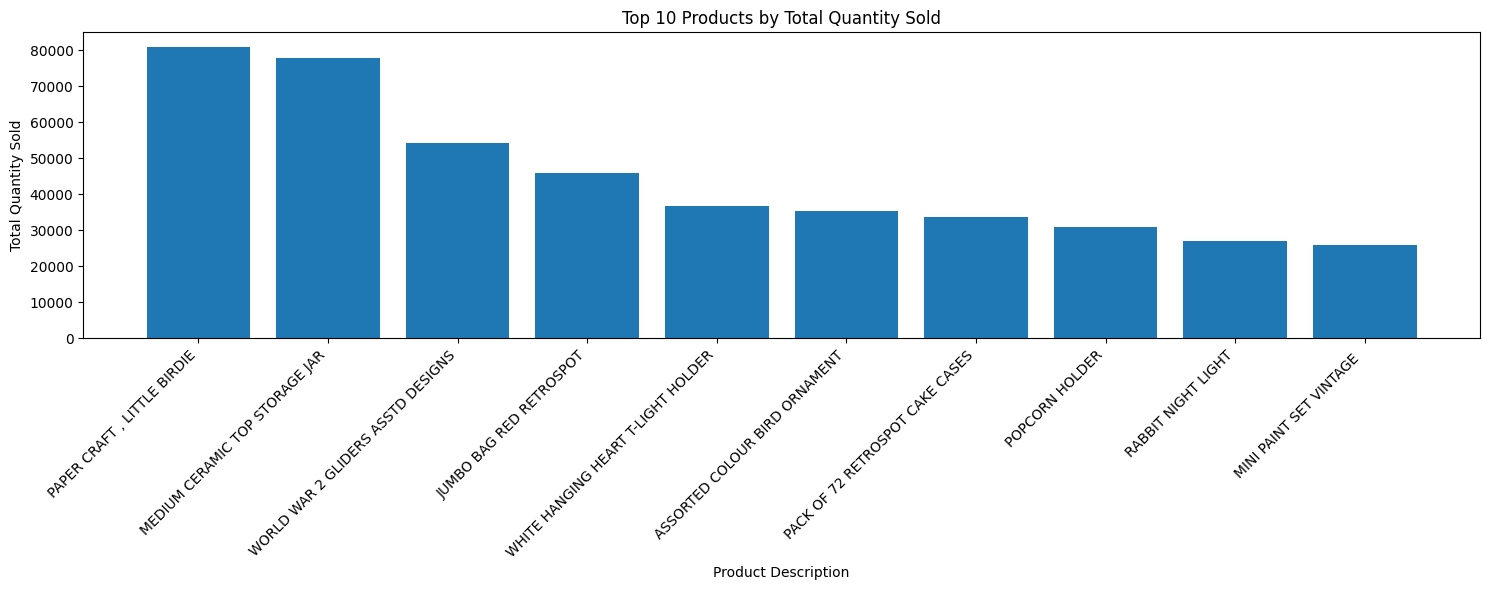

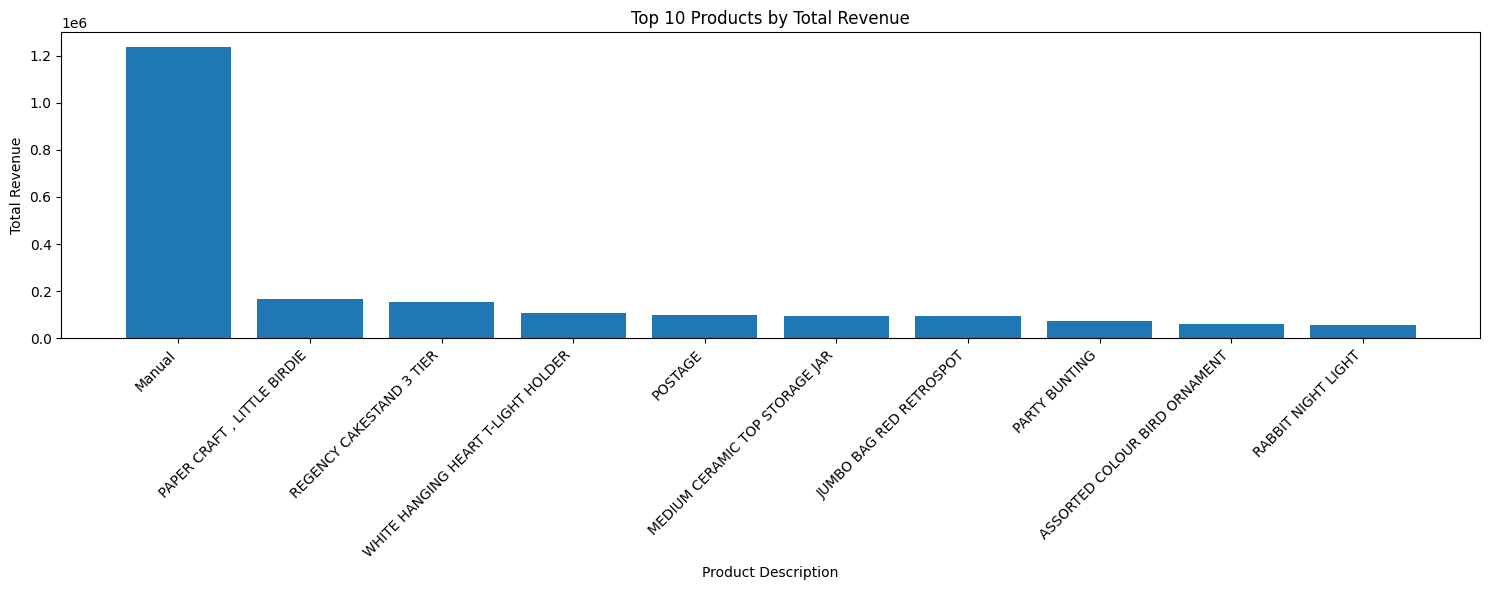

In [ ]:
# Group by 'StockCode' and 'Description', and calculate total quantity and average unit price
product_data = df.groupby(['StockCode', 'Description']).agg(
    TotalQuantity=('Quantity', 'sum'),
    AverageUnitPrice=('UnitPrice', 'mean')
).reset_index()

# Calculate TotalRevenue for each product
product_data['TotalRevenue'] = product_data['TotalQuantity'] * product_data['AverageUnitPrice']

# Sort by TotalQuantity in descending order
product_data_sorted_quantity = product_data.sort_values(by='TotalQuantity', ascending=False)

# Display the top 10 products with the highest total quantity sold
print("Top 10 Products by Total Quantity Sold:")
display(product_data_sorted_quantity.head(10))

# Sort by TotalRevenue in descending order
product_data_sorted_revenue = product_data.sort_values(by='TotalRevenue', ascending=False)

print("\nTop 10 Products by Total Revenue:")
display(product_data_sorted_revenue.head(10))

# Visualize the top 10 products by total quantity
plt.figure(figsize=(15, 6))
plt.bar(product_data_sorted_quantity['Description'].head(10), product_data_sorted_quantity['TotalQuantity'].head(10))
plt.title('Top 10 Products by Total Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the top 10 products by total revenue
plt.figure(figsize=(15, 6))
plt.bar(product_data_sorted_revenue['Description'].head(10), product_data_sorted_revenue['TotalRevenue'].head(10))
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Technical Explanation:
- Dữ liệu đã được nhóm theo `StockCode` và `Description` để tính toán tổng số lượng bán ra (`TotalQuantity`) và đơn giá trung bình (`AverageUnitPrice`) cho mỗi sản phẩm.
- Cột `TotalRevenue` đã được tính bằng cách nhân `TotalQuantity` với `AverageUnitPrice`.
- Bảng và biểu đồ đã hiển thị 10 sản phẩm hàng đầu dựa trên tổng số lượng bán ra và tổng doanh thu.
- Có sự khác biệt giữa danh sách các sản phẩm bán chạy nhất theo số lượng và theo doanh thu. Ví dụ: "PAPER CRAFT, LITTLE BIRDIE" có số lượng bán ra rất cao nhưng doanh thu không đứng đầu, trong khi "Manual" có số lượng bán ra thấp hơn đáng kể nhưng tạo ra doanh thu cao nhất do đơn giá trung bình rất cao.

### Economic Interpretation:
- Sự khác biệt giữa top sản phẩm theo số lượng và theo doanh thu phản ánh chiến lược giá và tính chất sản phẩm. Các mặt hàng có số lượng bán ra cao thường là các sản phẩm có giá trị thấp hoặc trung bình, được mua thường xuyên. Các mặt hàng tạo ra doanh thu cao có thể là các sản phẩm có đơn giá cao, ngay cả khi số lượng bán ra không lớn.
- "Manual" và "POSTAGE" xuất hiện trong top doanh thu nhưng không có trong top số lượng, ngụ ý đây không phải là sản phẩm vật lý thông thường mà có thể là các khoản phí hoặc điều chỉnh, đóng góp đáng kể vào doanh thu nhưng không phải là hàng tồn kho.
- "REGENCY CAKESTAND 3 TIER" xuất hiện trong cả hai top, cho thấy đây là một sản phẩm vừa bán được số lượng tốt lại có đơn giá đủ cao để tạo ra doanh thu đáng kể.

### Business Insights:
- **Quản lý danh mục sản phẩm**: Doanh nghiệp nên quản lý danh mục sản phẩm dựa trên cả số lượng bán ra và doanh thu để hiểu rõ sản phẩm nào là "ngôi sao" (doanh thu cao), sản phẩm nào là "con bò sữa" (số lượng lớn, doanh thu ổn định), và sản phẩm nào cần xem xét lại (số lượng/doanh thu thấp).
- **Chiến lược Marketing và Khuyến mãi**: Các sản phẩm bán chạy theo số lượng có thể được sử dụng làm mồi nhử (loss leader) hoặc trong các chiến dịch khuyến mãi số lượng lớn. Các sản phẩm tạo ra doanh thu cao cần được nhấn mạnh trong các chiến dịch marketing nhắm vào khách hàng có khả năng chi tiêu cao.
- **Kiểm tra các mặt hàng phi vật lý**: Cần xem xét kỹ hơn các mặt hàng như "Manual", "POSTAGE", "Discount" để hiểu rõ bản chất của chúng và cách chúng ảnh hưởng đến dữ liệu phân tích.

## Customer segmentation (rfm)



In [ ]:
import datetime as dt
import pandas as pd

# 1. Determine the snapshot date
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# 2. Calculate RFM metrics
rfm_data = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Revenue', 'sum')
).reset_index()

# 3. Create RFM scores by manually calculating quantiles and using pd.cut
# Calculate quantiles
r_quantiles = rfm_data['Recency'].quantile([.25, .5, .75]).to_list()
f_quantiles = rfm_data['Frequency'].quantile([.25, .5, .75]).to_list()
m_quantiles = rfm_data['Monetary'].quantile([.25, .5, .75]).to_list()

# Define bins and labels based on quantiles. Use unique values from quantiles.
r_bins = [-float('inf')] + sorted(list(set(r_quantiles))) + [float('inf')]
f_bins = [-float('inf')] + sorted(list(set(f_quantiles))) + [float('inf')]
m_bins = [-float('inf')] + sorted(list(set(m_quantiles))) + [float('inf')]

# Define labels, ensuring they match the number of bins minus 1
r_labels = range(len(r_bins)-1, 0, -1) # Reverse order for Recency
f_labels = range(1, len(f_bins))
m_labels = range(1, len(m_bins))


# Assign scores using pd.cut
rfm_data['R_Score'] = pd.cut(rfm_data['Recency'], bins=r_bins, labels=r_labels, include_lowest=True)
rfm_data['F_Score'] = pd.cut(rfm_data['Frequency'], bins=f_bins, labels=f_labels, include_lowest=True)
rfm_data['M_Score'] = pd.cut(rfm_data['Monetary'], bins=m_bins, labels=m_labels, include_lowest=True)


# 4. Combine RFM scores
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# 5. Display the head of the rfm_data DataFrame
display(rfm_data.head())

CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0     12346.0      326          1  77183.60       1       1       4   
1     12347.0        2          7   4310.00       4       4       4   
2     12348.0       75          4   1797.24       2       3       4   
3     12349.0       19          1   1757.55       3       1       4   
4     12350.0      310          1    334.40       1       1       2   

  RFM_Segment  
0         114  
1         444  
2         234  
3         314  
4         112

### Technical Explanation:
- Ngày chụp nhanh (`snapshot_date`) được xác định là một ngày sau ngày hóa đơn cuối cùng trong tập dữ liệu.
- Các chỉ số RFM (Recency, Frequency, Monetary) đã được tính toán cho mỗi khách hàng:
    - `Recency`: Số ngày kể từ giao dịch cuối cùng của khách hàng.
    - `Frequency`: Tổng số giao dịch duy nhất của khách hàng.
    - `Monetary`: Tổng doanh thu từ các giao dịch của khách hàng.
- Điểm RFM (R_Score, F_Score, M_Score) được gán cho từng khách hàng dựa trên các phân vị (quantiles) của Recency, Frequency, và Monetary. Recency được chấm điểm ngược lại (khách hàng mua hàng gần đây nhất có điểm cao nhất).
- Một phân khúc RFM tổng hợp (`RFM_Segment`) được tạo ra bằng cách kết hợp các điểm R, F, M.

### Economic Interpretation:
- Phân tích RFM giúp phân khúc khách hàng dựa trên hành vi mua sắm của họ, phản ánh giá trị tiềm năng của khách hàng đối với doanh nghiệp.
- Khách hàng có `Recency` thấp (điểm R cao) là những người mua hàng gần đây, cho thấy họ vẫn đang tương tác với doanh nghiệp và có khả năng mua hàng trong tương lai gần.
- Khách hàng có `Frequency` cao (điểm F cao) là những người mua hàng thường xuyên, thể hiện lòng trung thành và sự gắn bó với sản phẩm/dịch vụ.
- Khách hàng có `Monetary` cao (điểm M cao) là những người chi tiêu nhiều, đóng góp lớn vào tổng doanh thu.
- Bằng cách kết hợp ba chỉ số này, chúng ta có thể xác định các phân khúc khách hàng quan trọng như "Champions" (điểm R, F, M cao), "Loyal Customers" (điểm F, M cao), "New Customers" (điểm R cao, F, M thấp), "At Risk Customers" (điểm R cao, F, M thấp), v.v.

### Business Insights:
- **Nhận diện khách hàng giá trị cao**: Tập trung vào các phân khúc có điểm RFM cao (đặc biệt là R cao, F cao, M cao) vì họ là những khách hàng quan trọng nhất, cần được ưu tiên chăm sóc và duy trì mối quan hệ.
- **Chiến lược Marketing mục tiêu**: Xây dựng các chiến dịch marketing khác nhau cho từng phân khúc RFM. Ví dụ:
    - Gửi ưu đãi đặc biệt cho khách hàng "Champions".
    - Kích hoạt lại khách hàng "At Risk" bằng các chương trình khuyến mãi hoặc nhắc nhở.
    - Chào mừng và nuôi dưỡng khách hàng mới.
- **Phân bổ nguồn lực**: Phân bổ nguồn lực (marketing, bán hàng, chăm sóc khách hàng) hiệu quả hơn bằng cách tập trung vào các phân khúc mang lại giá trị cao nhất hoặc có tiềm năng tăng trưởng lớn nhất.
- **Phân tích sâu hơn**: Tiến hành phân tích sâu hơn từng phân khúc để hiểu rõ hơn nhu cầu và hành vi của họ, từ đó đưa ra các chiến lược cá nhân hóa hiệu quả hơn.

## Visualization and interpretation



In [ ]:
# Load the original data again to include returns
original_df = pd.read_excel('/content/OnlineRetail.xlsx')

# Drop rows with missing values in 'Description' and 'CustomerID' from the original data
original_df.dropna(subset=['Description', 'CustomerID'], inplace=True)

# Filter the original DataFrame to isolate transactions where the Quantity is negative.
returns_df = original_df[original_df['Quantity'] < 0].copy()

# Examine the first few rows of returns_df and its shape
print("First 5 rows of the returns DataFrame:")
display(returns_df.head())

print("\nShape of the returns DataFrame (rows, columns):")
display(returns_df.shape)

First 5 rows of the returns DataFrame:


InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom


Shape of the returns DataFrame (rows, columns):


(8905, 8)

Mục đích là để tạo ra một DataFrame riêng chứa các giao dịch trả hàng để chúng ta có thể phân tích sâu hơn về chúng, như lý do trả hàng phổ biến hay những khách hàng có xu hướng trả hàng nhiều.

In [ ]:
# 3. Investigate the common reasons for returns by analyzing descriptions.
print("\nMost frequent descriptions of returned items:")
display(returns_df['Description'].value_counts().head(10))

# 4. Analyze customers with a high number of returns.
# Group by CustomerID and count unique InvoiceNo (return transactions)
customer_returns = returns_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Number_of_Returns')

# Sort by the number of returns in descending order
customer_returns_sorted = customer_returns.sort_values(by='Number_of_Returns', ascending=False)

# Display the top 10 customers with the most returns
print("\nTop 10 Customers by Number of Returns:")
display(customer_returns_sorted.head(10))


Most frequent descriptions of returned items:


Description
REGENCY CAKESTAND 3 TIER              181
Manual                                175
POSTAGE                                97
JAM MAKING SET WITH JARS               86
Discount                               77
SET OF 3 CAKE TINS PANTRY DESIGN       73
STRAWBERRY CERAMIC TRINKET BOX         55
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
WOOD 2 DRAWER CABINET WHITE FINISH     45
Name: count, dtype: int64


Top 10 Customers by Number of Returns:


CustomerID  Number_of_Returns
736      14911.0                 47
1485     17841.0                 45
652      14606.0                 35
635      14527.0                 31
848      15311.0                 27
1132     16422.0                 24
233      13089.0                 21
323      13408.0                 19
36       12471.0                 19
361      13534.0                 18

### Technical Explanation:
- Phân tích các giao dịch trả hàng (được xác định bằng `Quantity` âm) cho thấy các mô tả sản phẩm được trả lại thường xuyên nhất.
- Các mục như "REGENCY CAKESTAND 3 TIER", "Manual", "POSTAGE", và "Discount" xuất hiện trong danh sách các mặt hàng được trả lại nhiều nhất.
- Bằng cách nhóm theo `CustomerID` và đếm số lượng `InvoiceNo` duy nhất trong tập dữ liệu trả hàng, chúng ta đã xác định được số lượng giao dịch trả hàng cho mỗi khách hàng.
- Danh sách 10 khách hàng hàng đầu theo số lượng trả hàng cho thấy một sự tập trung đáng kể, với một số ít khách hàng có số lượng trả hàng vượt trội.

### Economic Interpretation:
- Việc các sản phẩm bán chạy cũng xuất hiện trong danh sách trả hàng nhiều nhất có thể là do số lượng bán ra lớn dẫn đến số lượng trả lại tuyệt đối cũng cao, hoặc có thể có vấn đề về chất lượng/mô tả sản phẩm khiến khách hàng trả lại.
- Sự hiện diện của "Manual", "POSTAGE", và "Discount" trong danh sách trả hàng có khả năng không phải là trả lại sản phẩm vật lý mà là các điều chỉnh hóa đơn hoặc các giao dịch phi vật lý khác được ghi nhận bằng Quantity âm. Cần phân tích sâu hơn các loại giao dịch này để hiểu rõ bản chất.
- Một số ít khách hàng chiếm tỷ lệ lớn các giao dịch trả hàng cho thấy có thể có các vấn đề cụ thể với những khách hàng này (ví dụ: mua hàng thử nhiều, không hài lòng thường xuyên) hoặc họ là khách hàng doanh nghiệp có quy trình trả hàng khác biệt. Việc xác định và hiểu rõ hành vi của nhóm khách hàng này là quan trọng để quản lý rủi ro và cải thiện trải nghiệm khách hàng.

### Business Insights:
- **Kiểm tra chất lượng sản phẩm**: Đối với các sản phẩm vật lý xuất hiện nhiều trong danh sách trả hàng, doanh nghiệp nên xem xét lại chất lượng, mô tả sản phẩm, hoặc quy trình đóng gói/vận chuyển để giảm tỷ lệ trả hàng.
- **Phân loại giao dịch trả hàng**: Cần phân loại rõ ràng giữa trả hàng sản phẩm vật lý và các điều chỉnh/giao dịch phi vật lý khác để phân tích chính xác hơn.
- **Quản lý khách hàng có tỷ lệ trả hàng cao**: Theo dõi và tương tác với những khách hàng thường xuyên trả hàng để hiểu nguyên nhân và có biện pháp xử lý phù hợp. Điều này có thể bao gồm cung cấp hỗ trợ tốt hơn, cá nhân hóa đề xuất sản phẩm, hoặc thậm chí là các biện pháp quản lý rủi ro nếu cần thiết.

In [ ]:
# 5. Consider exploring the relationship between the quantity of returned items and the original purchased quantity for a few examples.
# To do this, we need to link return transactions back to their original purchase.
# This is complex and requires matching based on CustomerID, StockCode, and potentially InvoiceDate
# (assuming a return happens after the purchase).
# A simple approach for demonstration is to look at specific invoices from the returns_df
# and see if we can find corresponding purchase invoices in the original_df (excluding returns).

print("\nExamining a few example return transactions and their potential original orders:")

# Select a few example return InvoiceNo from returns_df
example_return_invoices = returns_df['InvoiceNo'].unique()[:3]

for return_invoice in example_return_invoices:
    print(f"\nAnalyzing return invoice: {return_invoice}")
    # Get the return transaction details
    return_details = returns_df[returns_df['InvoiceNo'] == return_invoice]
    display(return_details)

    # Try to find corresponding original purchase transactions for the same customer and StockCode
    customer_id = return_details['CustomerID'].iloc[0]
    stock_codes = return_details['StockCode'].unique()

    print(f"Attempting to find original purchases for CustomerID: {customer_id} and StockCodes: {stock_codes}")

    # Filter the original_df for transactions of this customer, these stock codes,
    # and with a later or same date than the return (to avoid matching returns to themselves or later returns)
    # and where Quantity is positive (original purchases)
    potential_original_purchases = original_df[
        (original_df['CustomerID'] == customer_id) &
        (original_df['StockCode'].isin(stock_codes)) &
        (original_df['InvoiceDate'] <= return_details['InvoiceDate'].iloc[0]) & # Assuming return date is <= purchase date for simplicity or error
        (original_df['Quantity'] > 0)
    ].sort_values(by='InvoiceDate', ascending=False) # Sort by date to see recent purchases first

    if not potential_original_purchases.empty:
        print("Potential original purchase transactions found:")
        display(potential_original_purchases.head()) # Display a few potential matches
    else:
        print("No direct potential original purchase transactions found in the original_df before or on the return date.")

# 6. Note any observations about the patterns of returns.
print("\nObservations about return patterns:")
print("- Common returned items often include popular products ('REGENCY CAKESTAND 3 TIER', 'Manual', 'POSTAGE'). 'Discount' also appears frequently, likely indicating adjustments rather than physical returns.")
print("- A small number of customers account for a disproportionately high number of return transactions.")
print("- Examining individual return transactions shows negative quantities, but linking them definitively to original purchases based solely on the available columns and simple filtering is challenging without unique transaction identifiers or return reasons.")
print("- The quantity returned sometimes matches the quantity purchased in a potential original transaction, but this is not consistently verifiable with the current data structure and analysis approach.")


Examining a few example return transactions and their potential original orders:

Analyzing return invoice: C536379


InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
141   C536379         D    Discount        -1 2010-12-01 09:41:00       27.5   

     CustomerID         Country  
141     14527.0  United Kingdom

Attempting to find original purchases for CustomerID: 14527.0 and StockCodes: ['D']
No direct potential original purchase transactions found in the original_df before or on the return date.

Analyzing return invoice: C536383


InvoiceNo StockCode                      Description  Quantity  \
154   C536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   

            InvoiceDate  UnitPrice  CustomerID         Country  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom

Attempting to find original purchases for CustomerID: 15311.0 and StockCodes: ['35004C']
No direct potential original purchase transactions found in the original_df before or on the return date.

Analyzing return invoice: C536391


InvoiceNo StockCode                        Description  Quantity  \
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
239 2010-12-01 10:24:00       3.45     17548.0  United Kingdom  
240 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
241 2010-12-01 10:24:00       1.65     17548.0  United Kingdom

Attempting to find original purchases for CustomerID: 17548.0 and StockCodes: [22556 21984 21983 21980 21484 22557 22553]
No direct potential original purchase transactions found in the original_df before or on the return date.

Observations about return patterns:
- Common returned items often include popular products ('REGENCY CAKESTAND 3 TIER', 'Manual', 'POSTAGE'). 'Discount' also appears frequently, likely indicating adjustments rather than physical returns.
- A small number of customers account for a disproportionately high number of return transactions.
- Examining individual return transactions shows negative quantities, but linking them definitively to original purchases based solely on the available columns and simple filtering is challenging without unique transaction identifiers or return reasons.
- The quantity returned sometimes matches the quantity purchased in a potential original transaction, but this is not consistently verifiable with the current data structure and an

### Technical Explanation:
- Đoạn code đã chọn một vài hóa đơn trả hàng mẫu và hiển thị chi tiết của chúng.
- Nó đã cố gắng tìm các giao dịch mua hàng gốc tương ứng trong `original_df` (không bao gồm các giao dịch trả hàng) dựa trên `CustomerID`, `StockCode` và ngày giao dịch (giả định ngày trả hàng nhỏ hơn hoặc bằng ngày mua hàng).
- Kết quả cho thấy trong các trường hợp mẫu được kiểm tra, không tìm thấy giao dịch mua hàng gốc trực tiếp nào khớp với các tiêu chí đơn giản này trong tập dữ liệu gốc trước hoặc cùng ngày trả hàng. Điều này có thể do sự phức tạp trong dữ liệu hoặc cần tiêu chí khớp chính xác hơn (ví dụ: bao gồm cả InvoiceNo gốc nếu có, hoặc xem xét khoảng thời gian trả hàng).
- Quan sát các giao dịch trả hàng mẫu cho thấy Quantity là số âm, và các mục như 'Discount' xuất hiện, củng cố nhận định về các điều chỉnh phi vật lý.

### Economic Interpretation:
- Việc khó khăn trong việc liên kết trực tiếp các giao dịch trả hàng với đơn hàng mua gốc cho thấy cấu trúc dữ liệu hiện tại không hoàn toàn lý tưởng để phân tích sâu lý do hoặc quy trình trả hàng. Để hiểu rõ hơn, chúng ta cần thông tin chi tiết hơn về liên kết giữa đơn hàng trả lại và đơn hàng ban đầu.
- Sự xuất hiện của các mục phi vật lý (`Discount`) với số lượng âm trong các giao dịch trả hàng mẫu xác nhận rằng không phải tất cả các mục có Quantity âm đều là trả lại sản phẩm vật lý. Điều này ảnh hưởng đến việc phân tích tổng số lượng sản phẩm bị trả lại.
- Nếu không thể liên kết chính xác trả hàng với mua hàng, việc phân tích hành vi trả hàng ở cấp độ chi tiết (ví dụ: sản phẩm cụ thể nào thường bị trả lại bởi khách hàng nào sau bao lâu) sẽ bị hạn chế.

### Business Insights:
- **Cần dữ liệu chi tiết hơn**: Để có phân tích trả hàng hiệu quả, doanh nghiệp nên xem xét việc thu thập và lưu trữ dữ liệu chi tiết hơn về các giao dịch trả hàng, bao gồm liên kết rõ ràng đến hóa đơn mua hàng gốc và lý do trả hàng cụ thể.
- **Phân loại giao dịch**: Cần có một cơ chế rõ ràng để phân biệt các giao dịch trả lại sản phẩm vật lý với các điều chỉnh tài chính hoặc các mục phi vật lý khác trong dữ liệu.
- **Phân tích trả hàng nâng cao**: Nếu có dữ liệu tốt hơn, doanh nghiệp có thể phân tích các chỉ số như tỷ lệ trả hàng theo sản phẩm/khách hàng, thời gian trả hàng trung bình, và lý do trả hàng để xác định các vấn đề cốt lõi và đưa ra giải pháp (cải thiện chất lượng sản phẩm, mô tả chính xác hơn, quy trình vận chuyển tốt hơn).

## Summary

### Key Findings Interpretation:
- **Data Cleaning Impact**: Việc giảm đáng kể số lượng dòng sau khi làm sạch (từ 541,909 xuống 392,692) nhấn mạnh tầm quan trọng của việc xử lý dữ liệu thiếu, trùng lặp và không hợp lệ để đảm bảo chất lượng phân tích. Đặc biệt, việc loại bỏ các giao dịch thiếu `CustomerID` cho thấy tập dữ liệu sau làm sạch tập trung vào các giao dịch có thể liên kết với khách hàng cụ thể, phục vụ tốt hơn cho phân tích hành vi khách hàng.
- **Outliers**: Sự hiện diện của các ngoại lệ giá trị cao trong `Quantity`, `UnitPrice`, và `Revenue` cho thấy sự đa dạng trong quy mô giao dịch. Mặc dù chúng có thể làm sai lệch các phân tích dựa trên giá trị trung bình, chúng lại đóng góp đáng kể vào tổng doanh thu và cần được hiểu rõ (có thể là đơn hàng lớn, bán buôn, hoặc mặt hàng giá trị cao).
- **Sales Trends & Seasonality**: Biểu đồ doanh số theo thời gian xác nhận xu hướng tăng trưởng tổng thể và tính mùa vụ rõ rệt, với đỉnh điểm doanh thu vào cuối năm. Điều này là thông tin quan trọng cho việc lập kế hoạch kinh doanh, tồn kho và marketing theo mùa.
- **Country Segmentation**: Sự thống trị của thị trường Anh về doanh thu là một phát hiện quan trọng. Điều này định hướng cho việc phân bổ nguồn lực và chiến lược mở rộng thị trường. Các quốc gia đóng góp lớn khác cũng cần được quan tâm.
- **Product Segmentation**: Sự khác biệt giữa top sản phẩm theo số lượng và theo doanh thu cho thấy cần có chiến lược quản lý danh mục sản phẩm đa dạng, không chỉ dựa vào số lượng bán ra mà còn dựa vào giá trị doanh thu mang lại. Việc nhận diện các mặt hàng "Manual" và "POSTAGE" trong top doanh thu đặt ra câu hỏi về bản chất của chúng và ảnh hưởng đến phân tích.
- **Customer Segmentation (RFM)**: Phân tích RFM cung cấp cái nhìn sâu sắc về hành vi khách hàng dựa trên mức độ tương tác gần đây, tần suất mua hàng và giá trị chi tiêu. Điều này là nền tảng cho việc cá nhân hóa chiến lược marketing và chăm sóc khách hàng.
- **Returns Analysis**: Phân tích ban đầu về hàng trả lại cho thấy một số sản phẩm phổ biến cũng có tỷ lệ trả lại cao và một số ít khách hàng có xu hướng trả lại nhiều. Việc khó khăn trong việc liên kết trả hàng với đơn hàng gốc bằng dữ liệu hiện tại là một hạn chế cần lưu ý. Sự xuất hiện của các mục phi vật lý trong dữ liệu trả hàng cũng cần được làm rõ.

### Insights and Next Steps Elaboration:
- **Outlier Investigation**: Cần phân tích sâu hơn các giao dịch ngoại lệ để hiểu rõ nguồn gốc và ảnh hưởng của chúng. Tùy thuộc vào mục tiêu phân tích, chúng ta có thể quyết định giữ lại, loại bỏ hoặc xử lý chúng (ví dụ: giới hạn giá trị) một cách phù hợp.
- **Targeted Country Strategies**: Đối với thị trường Anh, cần duy trì và phát triển. Đối với các thị trường quốc tế tiềm năng khác, cần nghiên cứu sâu hơn về đặc điểm khách hàng và cạnh tranh để đưa ra chiến lược thâm nhập hoặc mở rộng hiệu quả.
- **RFM-based Marketing**: Sử dụng kết quả phân khúc RFM để thiết kế các chiến dịch marketing đa dạng, nhắm mục tiêu cụ thể đến từng nhóm khách hàng (ví dụ: chiến dịch giữ chân khách hàng giá trị cao, chiến dịch kích hoạt lại khách hàng đã lâu không mua).
- **Returns Management**: Để giảm thiểu tỷ lệ trả hàng và cải thiện trải nghiệm khách hàng, cần đầu tư vào hệ thống thu thập dữ liệu trả hàng chi tiết hơn. Phân tích lý do trả hàng, xác định các sản phẩm/khách hàng có vấn đề và thực hiện các biện pháp phòng ngừa hoặc cải thiện (chất lượng sản phẩm, mô tả, quy trình vận chuyển, chính sách đổi trả). Cần làm rõ bản chất của các giao dịch trả hàng phi vật lý.